In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Weighted and directed graphs

In this notebook we will be showing how we can use NetworkX to study weighted and directed graphs.

In [16]:
G = nx.Graph()

G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 4)

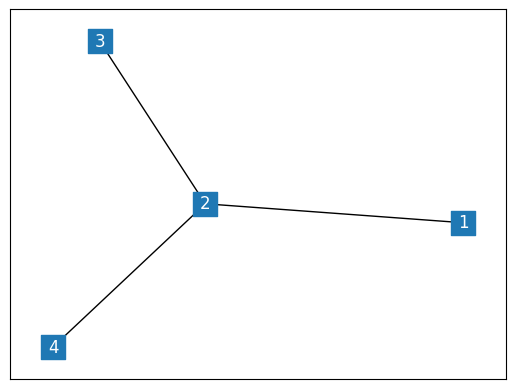

In [17]:
nx.draw_networkx(G, with_labels = True, font_color = 'white', node_shape='s')

In [18]:
def show_graph(graph):
    nx.draw_networkx(graph, with_labels = True, font_color = 'white', node_shape = 's')

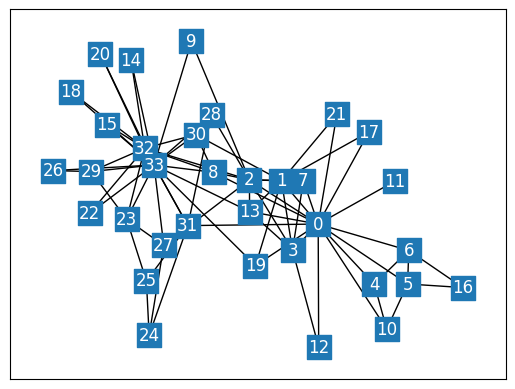

In [19]:
gr = nx.karate_club_graph()
show_graph(gr)

It all works as it should now. Let's continue by extending our original graph.

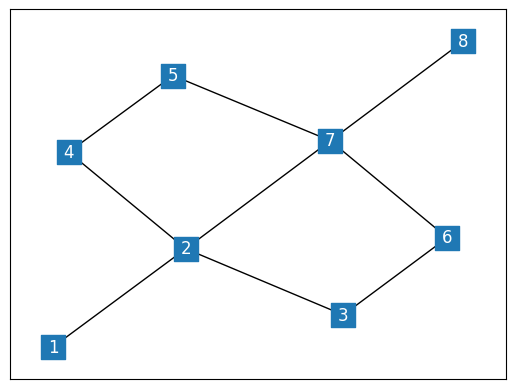

In [20]:
G.add_edge(4,5)
G.add_edge(3,6)

G.add_edge(5,7)
G.add_edge(6,7)

G.add_edge(7,8)
G.add_edge(2,7)

show_graph(G)

Let us now see what a shortest path between nodes 1 and 8 would looks like. We will be reusing some of the code that we developed in the previous notebook.

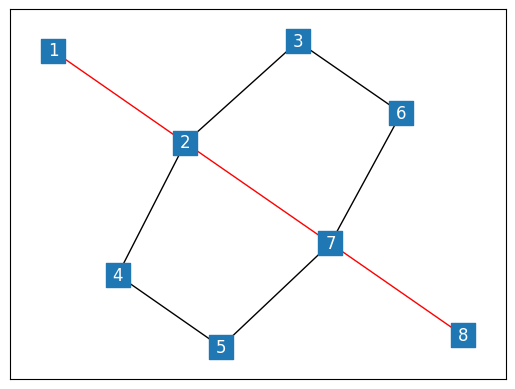

In [22]:
path = nx.shortest_path(G, source = 1, target =8)
edges_path = list(zip(path,path[1:]))

edges_path_reversed = [(y,x) for (x,y) in edges_path]
edges_path = edges_path + edges_path_reversed

edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]

nx.draw_networkx(G, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's')

The highlighted edges definitely look useful, but wouldn't it be nice if we also highlighted the nodes? We can do this using the node_color parameter.

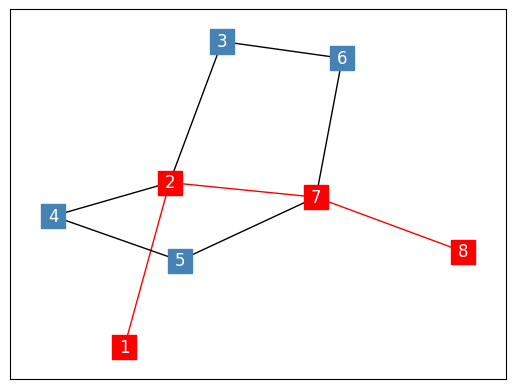

In [23]:
path = nx.shortest_path(G, source = 1, target =8)
nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]
nx.draw_networkx(G, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)

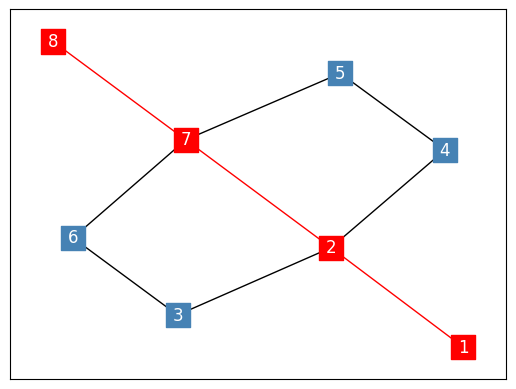

In [24]:
def show_path(from_node, to_node):
    path = nx.shortest_path(G, source = 1, target =8)

    edges_path = list(zip(path,path[1:]))

    edges_path_reversed = [(y,x) for (x,y) in edges_path]
    edges_path = edges_path + edges_path_reversed
    edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]

    nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]
    nx.draw_networkx(G, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    

show_path(6, 4)

### Weighted Graphs

We have so far assumed that our graphs are weightless - when it comes to calculating shortest paths, networkx uses a default weight for each edge.

We can inspect the parameter values of our edges using the following command:

In [25]:
nx.get_edge_attributes(G,'weight')

{}

It is to be expected, since we haven't actually assigned any weights so far. Let's initialise all weights to 1.

In [26]:
for i,j in G.edges():
    G[i][j]['weight'] = 1
    
nx.get_edge_attributes(G,'weight')

{(1, 2): 1,
 (2, 3): 1,
 (2, 4): 1,
 (2, 7): 1,
 (3, 6): 1,
 (4, 5): 1,
 (5, 7): 1,
 (6, 7): 1,
 (7, 8): 1}

Now, how about plotting the weight of the edges alongside our graph?

In [29]:
def show_wgraph():
    plt.figure()    
    pos = nx.spring_layout(G)
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

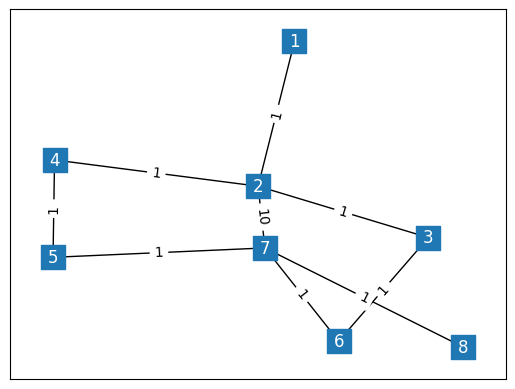

In [30]:
G[7][2]['weight'] = 10

show_wgraph()

And while we are at it, let's also implement our weighted shortest path function, incorporating our latest amendments to the rendering process.

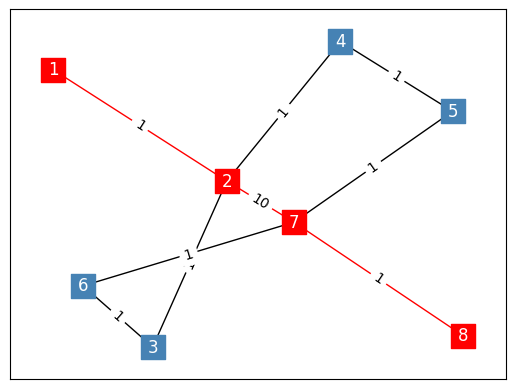

In [32]:
def show_wpath(from_node, to_node):
    plt.figure()    
    pos = nx.spring_layout(G)
    
    weight_labels = nx.get_edge_attributes(G,'weight')
    
    path = nx.shortest_path(G, source = from_node, target = to_node)

    edges_path = list(zip(path,path[1:]))
    edges_path_reversed = [(y,x) for (x,y) in edges_path]
    edges_path = edges_path + edges_path_reversed
    edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]

    nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]
    nx.draw_networkx(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

show_wpath(1,8)

There is something wrong here - the shortest path should definitely not pass from edge (2,7), given the weight of 10.

The issue actually lies with the nx.shortest_path() function - unless we explicitely tell it what weight values to consider, it assumes that no weights should be used.

To keep things simple, we will be using the nx.dijkstra_path() instead, which will use the weight parameters if they are present.

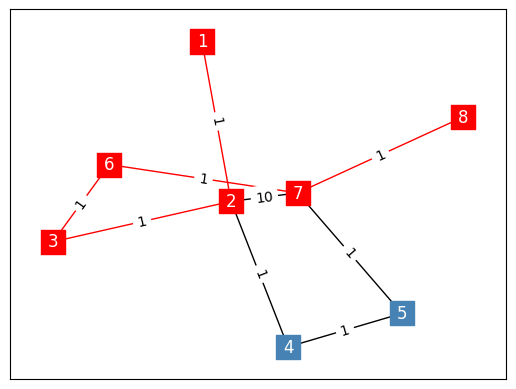

In [33]:
def show_wpath_d(from_node, to_node):
    plt.figure()    
    pos = nx.spring_layout(G)
    
    weight_labels = nx.get_edge_attributes(G,'weight')
    
    path = nx.dijkstra_path(G, source = from_node, target = to_node)

    edges_path = list(zip(path,path[1:]))
    edges_path_reversed = [(y,x) for (x,y) in edges_path]
    edges_path = edges_path + edges_path_reversed
    edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]

    nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]
    nx.draw_networkx(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

show_wpath_d(1,8)

## Directed Graphs

We can initiate a directed graph object using the nx.DiGraph() class.

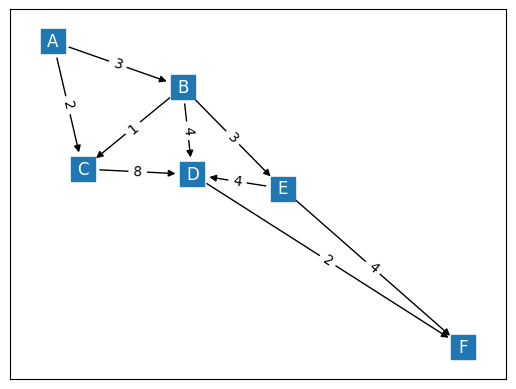

In [34]:
G = nx.DiGraph()

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')

G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=3)
G.add_edge('C', 'D', weight=8)
G.add_edge('E', 'F', weight=4)
G.add_edge('D', 'F', weight=2)
G.add_edge('B', 'D', weight=4)
G.add_edge('E', 'D', weight=4)

show_wgraph()

In [38]:
G.in_degree()

InDegreeView({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 1, 'F': 2})

In [41]:
G.in_degree(weight='weight')

InDegreeView({'A': 0, 'B': 3, 'C': 3, 'D': 16, 'E': 3, 'F': 6})

In [39]:
G.out_degree()

OutDegreeView({'A': 2, 'B': 3, 'C': 1, 'D': 1, 'E': 2, 'F': 0})

In [40]:
G.out_degree(weight='weight')

OutDegreeView({'A': 5, 'B': 8, 'C': 8, 'D': 2, 'E': 8, 'F': 0})

As you can see above, our prevously defined show_wgraph() command is capable of visualising the direction of the edge without us having to add any new code - it appears that the nx.draw() function can tell the differnce between Graph and DiGraph.

The structure of the above graph looks OK, however, visually it does not look like the image that we used as a guide. This is becuase we have yet to define any locations for the nodes, and networkx uses its internal layout engine to come up with a random arrangement every time that we call the nx.draw() function.

To address this, we can define our own own position dictionary, and assign x,y coordinates on our own. We can assume that the nodes are positioned in a grid with 3 rows and 5 columns

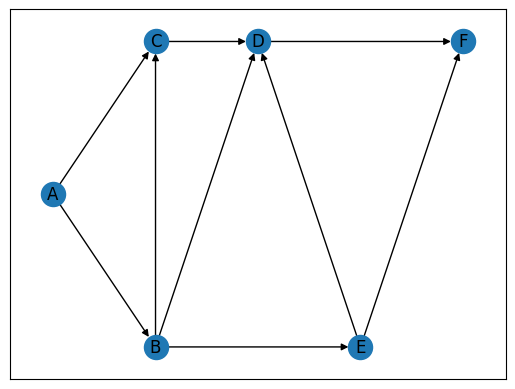

In [35]:
node_pos = {'A':(1,2),'B':(2,1),'C':(2,3),'D':(3,3),'E':(4,1),'F':(5,3)}

nx.draw_networkx(G, node_pos)

Let's now update the show_wgraph() function to be able to accept a position parameter.

We will use an optional parameter value (as before) to capture the node positions, but this time we will assign it a default value of None (the value that Python uses for an empty value).

Our revised function will check whether the value is None - if it, it will invoke the nx.spring_layout() algorithm, alternatively it will use the supplied positions.

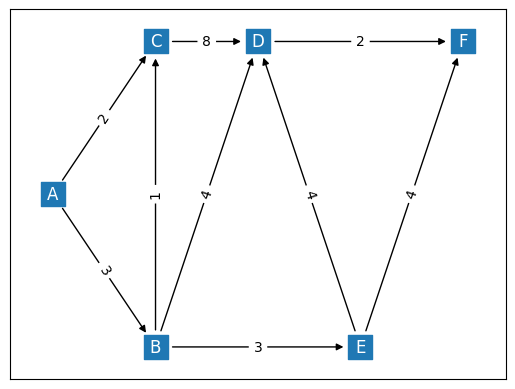

In [36]:
def show_wgraph(custom_node_positions=None):
    plt.figure() 
    
    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions
        
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
    
show_wgraph(node_pos)

Let's also update the show_wpath function to use node positioning

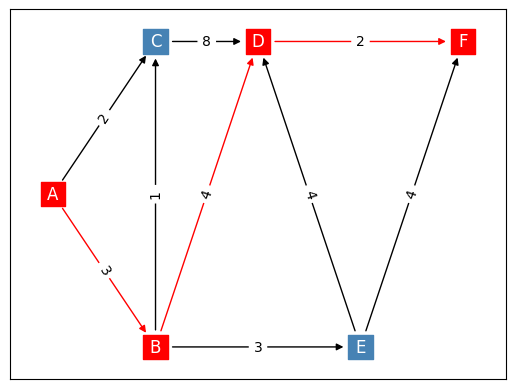

In [37]:
def show_wpath_d(from_node, to_node,custom_node_positions=None):
    plt.figure() 
    
    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions
    
    weight_labels = nx.get_edge_attributes(G,'weight')
    
    path = nx.dijkstra_path(G, source = from_node, target = to_node)

    edges_path = list(zip(path,path[1:]))
    edges_path_reversed = [(y,x) for (x,y) in edges_path]
    edges_path = edges_path + edges_path_reversed
    edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]

    nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]
    nx.draw_networkx(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

show_wpath_d('A','F',node_pos)